# Simple toy molecule



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.backends.sqlite_plus as db

In [7]:
toy = ToyModel(n_increments=18, sample_phase=False, true_value=DihedralType(10, 2, 0, 1, 1))


In [10]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='eliminate_rj_randomized.sqlite')
sampler.sample(iter=5000)

 [-----------------100%-----------------] 5001 of 5000 complete in 203.7 sec

In [39]:
plt.style.use('fivethirtyeight')

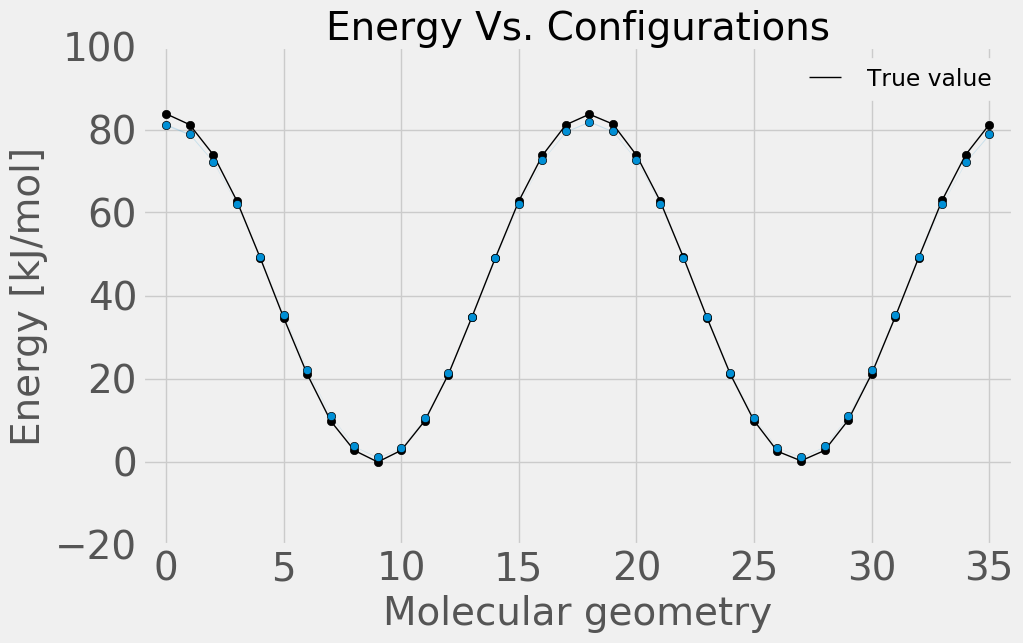

In [61]:
scale = 2

default_font = mpl.rcParams['font.size']
fsc = default_font*scale
fig = plt.figure(figsize=(5*scale, 3*scale))
ax = fig.add_subplot(111)

ax.plot(toy.synthetic_energy, color='black', label='True value', linewidth=1)
ax.plot(toy.synthetic_energy, 'ko')
ax.set_xlabel('Molecular geometry', fontsize=fsc)
ax.set_ylabel('Energy [kJ/mol]', fontsize=fsc)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_tick_params(labelsize=fsc)
plt.title('Energy Vs. Configurations', fontsize=fsc)
plt.legend();
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False);

## We can sample over the models to find the model that is most probable given the data!

In [41]:
multiplicities = (1,2,3,4,6)
mult_bitstring = []
for i in toy.model.pymc_parameters.keys():
    if i.split('_')[-1] == 'bitstring':
        mult_bitstring.append(i)
histogram = np.zeros((1, 5))

for j in sampler.trace('%s' % mult_bitstring[0])[:]:
    for k, l in enumerate(multiplicities):
        if 2**(l-1) & int(j):
                histogram[0][k] += 1

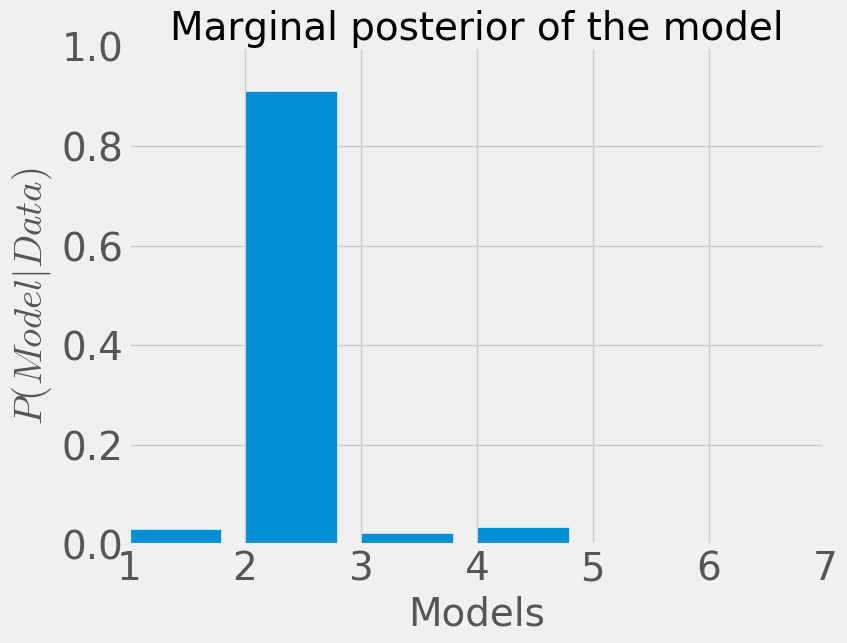

In [60]:
fig, ax = plt.subplots(1,1)
ax.bar(multiplicities, histogram[0]);
ax.set_xlabel('Models', fontsize=fsc)
ax.set_ylabel(r'$P (Model|Data)$', fontsize=fsc)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_tick_params(labelsize=fsc)
ax.set_title('Marginal posterior of the model', fontsize=fsc);